In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pickle as pickle

import sys
path = '../../scripts/'
sys.path.insert(0,path)
from ripser_to_dict import *
#from plot_persistence import *

In [14]:
with open('params.pickle','rb') as f:
    params = pickle.load(f)

## Functions

In [12]:
sigma = 0.1
dx, dy = np.array([0, 0])
gaussian = lambda dx, dy: 1. / (2. * np.pi * sigma)\
* np.exp(- 1. / (2. * sigma**2) * (dx**2 + dy**2))
print(gaussian(1,1))

5.92068480261e-44


In [37]:
def diffusion(PD,im_size,max_persistence,sigma):
    
    """Creates a Gaussian for each point and adds them together."""
    
    width = im_size[0]
    height = im_size[1]
    n_points, temp = PD.shape
    
    Gaussian = lambda dx, dy: 1. / (2. * np.pi * sigma)\
        * np.exp(- 1. / (2. * sigma**2) * (dx**2 + dy**2))
    
    out_im = np.zeros((height,width))
    
    for n in range(n_points):
        for y in range(height):
            for x in range(width):
                dx = x * max_persistence / (float)(width - 1) - PD[n,0]
                dy = y * max_persistence / (float)(height - 1) - PD[n,1]
                out_im[x,y] += gaussian(dx,dy)
    
    out_im = out_im.T
    out_im = np.flipud(out_im)
    
    return out_im

## Run

## Test

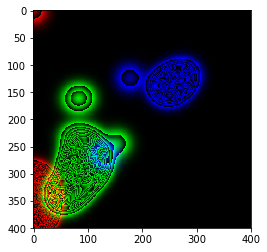

In [39]:
max_persistence = params['ripser']['max_persistence']
sigma = 0.1
im_size = [400,400]
seed = 0
shape = 'torus'
all_channels = [0,1,2]
out_im = np.zeros((im_size[0],im_size[1],len(all_channels)))
for channel in all_channels:
    with open(params['paths']['code_to_data'] + 'persistences/'\
                          + shape + '/' + str(seed) + '.pickle', \
                          'rb') as f:
        temp = pickle.load(f)
    PD = temp[channel].copy()
    out_im[:,:,channel] = diffusion(PD,im_size,max_persistence,sigma)
plt.imshow(out_im)